# **Лекция 9: `pandas`  и визуализирование пространственно распределенных данных в `matplotlib`**

## **План лекции**

- Обсуждение плана лекции и организационных вопросов
- `pandas`
    - Загрузка данных
    - Датафрейм и его превью
    - Колонки
    - Индексирование
    - Сохранение датафреймов
- `matplotlib` и данные зависящие от двух переменных
    - `plt.scatter`
    - Цветовые схемы
    - `plt.pcolormesh`
    - `np.meshgrid`

Импортируем все нужные нам библиотеки:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

# `pandas`

`pandas` это очень удобная библиотека для загрузки, обработки и индексирование табличных данных. Любые данные, которые записаны в виде таблиц (`csv`, `xls`, etc.) можно загрузить с помощью `pandas` и работать с ними!

> ☝️ **Когда использовать `pandas`**?
> 
> Я не советую использовать `pandas` для работы со ВСЕМИ данными. Используйте его в тех случаях, когда в вашей таблице есть строчные данные или данные с датой/временем! В случаях работы с массивами данных я настоятельно рекоммендую использовать `np.loadtxt`: это гораздо более быстро и существенно более оптимизировано.

### Считывание

Для того чтобы загрузить данные, нам понадобится функция `pd.read_csv()`. Синтаксис и полезные аргументы:
- `pd.read_csv('filename.csv')`: считываем файл `filename.csv`.
- Аргумент `delimiter=`: позволяет считывать данные, разделенные разными символами. Стандратный разделить - запятая.
- Аргумент `skiprows=`: позволяет пропускать линии в начале файла
- Аргумент `usecols=`: позволяет считывать только определенные столбцы и принимает на вход список названий столбцов, которые надо считывать. Например `usecols=['City', 'State', 'Model Year']`
- Аргумент `encoding=`: задает кодировку. Если что-то слетает, советую попробовать `encoding='utf8'`

Тип данных назвается `pandas.dataframe` или просто *датафрейм*. Иногда в качесте стандартного названия переменной используют `df`, поэтому так иногда тоже могут назвать! Давайте загрузим какой-нибудь датасет и посмотрим как работать с данными:

In [142]:
electric_vehicles = pd.read_csv('data/Electric_Vehicle_Population_Data.csv')
electric_vehicles

VIN (1-10)     County          City State  Postal Code  Model Year  \
0    5UXKT0C59G     Yakima        Zillah    WA      98953.0        2016   
1    5YJ3E1EA2J  Snohomish       Edmonds    WA      98020.0        2018   
2    1G1RE6E4XE     Kitsap  Port Orchard    WA      98367.0        2014   
3    2C4RC1L76M     Skagit           Bow    WA      98232.0        2021   
4    5YJ3E1EA2J   Thurston       Olympia    WA      98513.0        2018   
..          ...        ...           ...   ...          ...         ...   
194  1FTVW1EL7P       King       Redmond    WA      98052.0        2023   
195  WVGUNPE22M       King       Redmond    WA      98052.0        2021   
196  JN1AZ0CP5B       King       Redmond    WA      98052.0        2011   
197  WA1LAAGE0K     Pierce      Lakewood    WA      98498.0        2019   
198  WVGUNPE28M     Kitsap     Hansville    WA      98340.0        2021   

           Make     Model                   Electric Vehicle Type  \
0           BMW        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1         TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
2     CHEVROLET      VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
3      CHRYSLER  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
4         TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
..          ...       ...                                     ...   
194        FORD     F-150          Battery Electric Vehicle (BEV)   
195  VOLKSWAGEN      ID.4          Battery Electric Vehicle (BEV)   
196      NISSAN      LEAF          Battery Electric Vehicle (BEV)   
197        AUDI    E-TRON          Battery Electric Vehicle (BEV)   
198  VOLKSWAGEN      ID.4          Battery Electric Vehicle (BEV)   

     Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                Not eligible due to low battery range              14   
1              Clean Alternative Fuel Vehicle Eligible             215   
2              Clean Alternative Fuel Vehicle Eligible              38   
3              Clean Alternative Fuel Vehicle Eligible              32   
4              Clean Alternative Fuel Vehicle Eligible             215   
..                                                 ...             ...   
194  Eligibility unknown as battery range has not b...               0   
195  Eligibility unknown as battery range has not b...               0   
196            Clean Alternative Fuel Vehicle Eligible              73   
197            Clean Alternative Fuel Vehicle Eligible             204   
198  Eligibility unknown as battery range has not b...               0   

     Base MSRP  Legislative District  DOL Vehicle ID  \
0            0                  15.0       206822717   
1            0                  21.0       137721636   
2            0                  26.0       197718468   
3            0                  40.0       256274308   
4            0                   2.0       259176578   
..         ...                   ...             ...   
194          0                  45.0       258071341   
195          0                  48.0       187507470   
196          0                  48.0       221511090   
197          0                  28.0       254808872   
198          0                  23.0       200779771   

                                  Electric Utility  2020 Census Tract  \
0                                       PACIFICORP       5.307700e+10   
1                           PUGET SOUND ENERGY INC       5.306105e+10   
2                           PUGET SOUND ENERGY INC       5.303509e+10   
3                           PUGET SOUND ENERGY INC       5.305795e+10   
4                           PUGET SOUND ENERGY INC       5.306701e+10   
..                                             ...                ...   
194  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10   
195  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10   
196  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)      

Как вы уже заметили, в `jupyter` переменную можно выводить, просто написав ее в последней строчке ячейки, без `print`-а. В случае пандас, это создает очень удобную табличку с превью её начала и конца!

Другую полезную информацию можно узнать с помощью метода `.info()`:

In [143]:
electric_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         199 non-null    object 
 1   County                                             199 non-null    object 
 2   City                                               199 non-null    object 
 3   State                                              199 non-null    object 
 4   Postal Code                                        199 non-null    float64
 5   Model Year                                         199 non-null    int64  
 6   Make                                               199 non-null    object 
 7   Model                                              199 non-null    object 
 8   Electric Vehicle Type                              199 non-null    object 
 9   Clean Alte

Превью начала и конца можно получить с помощью методов `.head(количество_строк)` и `.tail(количество_строк)`:

In [144]:
electric_vehicles.head(10)

VIN (1-10)     County          City State  Postal Code  Model Year  \
0  5UXKT0C59G     Yakima        Zillah    WA      98953.0        2016   
1  5YJ3E1EA2J  Snohomish       Edmonds    WA      98020.0        2018   
2  1G1RE6E4XE     Kitsap  Port Orchard    WA      98367.0        2014   
3  2C4RC1L76M     Skagit           Bow    WA      98232.0        2021   
4  5YJ3E1EA2J   Thurston       Olympia    WA      98513.0        2018   
5  WA1E2BFY8N  Snohomish     Snohomish    WA      98296.0        2022   
6  KNDCE3LG2K   Thurston       Olympia    WA      98506.0        2019   
7  5YJ3E1EB9K  Snohomish       Edmonds    WA      98020.0        2019   
8  WBY8P2C57K       King       Seattle    WA      98102.0        2019   
9  1FADP5CU2D   Thurston         Lacey    WA      98503.0        2013   

        Make     Model                   Electric Vehicle Type  \
0        BMW        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1      TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
2  CHEVROLET      VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
3   CHRYSLER  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
4      TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
5       AUDI        Q5  Plug-in Hybrid Electric Vehicle (PHEV)   
6        KIA      NIRO          Battery Electric Vehicle (BEV)   
7      TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
8        BMW        I3          Battery Electric Vehicle (BEV)   
9       FORD     C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range              14   
1           Clean Alternative Fuel Vehicle Eligible             215   
2           Clean Alternative Fuel Vehicle Eligible              38   
3           Clean Alternative Fuel Vehicle Eligible              32   
4           Clean Alternative Fuel Vehicle Eligible             215   
5             Not eligible due to low battery range              23   
6           Clean Alternative Fuel Vehicle Eligible             239   
7           Clean Alternative Fuel Vehicle Eligible             220   
8           Clean Alternative Fuel Vehicle Eligible             153   
9             Not eligible due to low battery range              19   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  15.0       206822717   
1          0                  21.0       137721636   
2          0                  26.0       197718468   
3          0                  40.0       256274308   
4          0                   2.0       259176578   
5          0                   1.0       207797957   
6          0                  22.0       256221178   
7          0                  32.0       477226991   
8          0                  43.0       121649510   
9          0                  22.0       115266077   

                               Electric Utility  2020 Census Tract  \
0                                    PACIFICORP       5.307700e+10   
1                        PUGET SOUND ENERGY INC       5.306105e+10   
2                        PUGET SOUND ENERGY INC       5.303509e+10   
3                        PUGET SOUND ENERGY INC       5.305795e+10   
4                        PUGET SOUND ENERGY INC       5.306701e+10   
5                        PUGET SOUND ENERGY INC       5.306105e+10   
6                        PUGET SOUND ENERGY INC       5.306701e+10   
7                        PUGET SOUND ENERGY INC       5.306105e+10   
8  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10   
9                        PUGET SOUND ENERGY INC       5.306701e+10   

   Vehicle Location Lat  Vehicle Location Lon  
0             46.405560           -120.263100  
1             47.808070           -122.375000  
2             47.505240           -122.684707  
3             48.561388           -122.440630  
4             46.988760           -122.817540  
5             47.885116           -1

### Колонки и `pd.Series`

Обращение с колонками в `pandas` в целом очень похоже на работу со словарем. Но это в целом довольно логично: по структуре это очень похоже на словарь, есть разные *ключи* (*названия столбцов*) и по ним есть *значения* (*значения столбцов*), только значений должно быть одинаковое количество по всем ключам. Названия колонок можно получить через параметр `.columns` (обращение к ниму без скобочек):

In [145]:
electric_vehicles.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Electric Utility', '2020 Census Tract', 'Vehicle Location Lat',
       'Vehicle Location Lon'],
      dtype='object')

Обращаться к конкретному столбцу нужно через название столбца в квадратных скобках:

In [146]:
electric_vehicles['Model']

0            X5
1       MODEL 3
2          VOLT
3      PACIFICA
4       MODEL 3
         ...   
194       F-150
195        ID.4
196        LEAF
197      E-TRON
198        ID.4
Name: Model, Length: 199, dtype: object

Это отдельный класс, который называется `Series`. Грубо говоря, с ним работает почти все, что и с `np.array`, но есть много мелких различий. Во многих случаях я советую его конвертировать в `np.array`:

In [147]:
electric_vehicles['Electric Range'].values

array([ 14, 215,  38,  32, 215,  23, 239, 220, 153,  19, 215, 107,  33,
       291, 107, 215, 249,  73,  72, 238, 291,   0,  21, 208,   0, 220,
        84,  26, 259, 150,  75, 215,  32,   0, 210,  84,  21,  25,  82,
       239, 151, 238,   0, 208, 270,  73, 204, 291, 210,  30, 208, 293,
       215,   0, 125,  75, 220, 215,  35, 210, 208,  14,  84,   0,  84,
       153,   0, 210,  25,  87, 220, 215, 210, 151, 239, 200, 107,  84,
       238,   0,  22,  25, 215,  21, 308, 151, 266, 234,  47,  33,  73,
         0,  83,  19,  47, 204,  81, 220, 266, 291, 150,  87,  84, 215,
        84, 210,  97,  23,  81,  13,  84,   0, 215,   0,  23,  72, 238,
       149,  53,  72,  37,   0, 266,  19, 208, 208,  72, 151, 266,  26,
         0,   0, 215,  84,  84, 220, 270, 293, 220,   0,   0, 215, 215,
        75,  38,  38,   0,   0, 208, 259,   0,   0, 322,  38,   0,   0,
        25,  25, 220,   0,   0,   0,  84,  23,  73,   0,   0,   0,   0,
         0,  84, 322,   0, 151,   0,  35,   0,  84, 259,   0,  3

У `Series` есть свои удобные методы. Перечислим самые полезные (все можно посмотреть [здесь](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)):
- Почти все методы `numpy`:

In [148]:
(electric_vehicles['Electric Range'].max(),
 electric_vehicles['Electric Range'].mean(),
 electric_vehicles['Electric Range'].min(),
 electric_vehicles['Electric Range'].argmax()) # индекс самого большого элемента

(322, 108.62814070351759, 0, 152)

- `.describe()`: позволяет получить короткое описание

In [149]:
electric_vehicles['Electric Range'].describe()

count    199.000000
mean     108.628141
std      100.428589
min        0.000000
25%       16.500000
50%       82.000000
75%      212.500000
max      322.000000
Name: Electric Range, dtype: float64

- `.unique()`: позволяет получить уникальные элементы 

In [154]:
electric_vehicles['Model'].unique()

array(['X5', 'MODEL 3', 'VOLT', 'PACIFICA', 'Q5', 'NIRO', 'I3', 'C-MAX',
       'LEAF', 'TUCSON', 'MODEL Y', 'MODEL S', 'BOLT EV', 'WRANGLER',
       'PRIUS PRIME', 'SPARK', 'R1T', 'E-TRON', 'MODEL X',
       'MUSTANG MACH-E', 'E-GOLF', '500', 'OUTLANDER', 'I-PACE',
       'CLARITY', 'R1S', 'B-CLASS', 'XC40', 'Q5 E', 'NX', 'FUSION',
       'IONIQ 5', 'AIR', 'GRAND CHEROKEE', 'BOLT EUV', 'SOLTERRA', 'ID.4',
       'XC90', 'EQE-CLASS SUV', 'EV6', 'GLC-CLASS', 'F-150'], dtype=object)

### Индексирование

У всех `pandas` датафреймов есть отдельный параметер (даже почти колонка) `index`, в превью она самая левая и обычно не подписывается. Ее можно получить с помощью `electric_vehicles.index` или `electric_vehicles.index`:

In [155]:
electric_vehicles.index, electric_vehicles.index.values

(RangeIndex(start=0, stop=199, step=1),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169

`index` создается при импорте и служит чем-то вроде номера элементов, но при этом он статичен и не меняется при изменениях таблицы внутри питона.

Другая крайне важная и удобная фишка `pandas` заключается в удобной и минималистичной системе масок. По сути, она максимально похожа на маски в `numpy` и почти идентична по синтаксису:

In [156]:
electric_vehicles[electric_vehicles['Make']=='BMW']

VIN (1-10)     County            City State  Postal Code  Model Year  \
0    5UXKT0C59G     Yakima          Zillah    WA      98953.0        2016   
8    WBY8P2C57K       King         Seattle    WA      98102.0        2019   
18   WBY1Z4C56E     Kitsap       Bremerton    WA      98312.0        2014   
49   5UXTA6C08N  Snohomish         Bothell    WA      98012.0        2022   
61   5UXKT0C34H    Douglas  East Wenatchee    WA      98802.0        2017   
65   WBY8P6C51K    Stevens       Loon Lake    WA      99148.0        2019   
96   WBY1Z2C52E       King         Seattle    WA      98119.0        2014   
106  WBY1Z8C38H  Snohomish         Bothell    WA      98012.0        2017   
108  WBY1Z2C50E     Yakima          Yakima    WA      98901.0        2014   
109  5UXKT0C53J    Spokane         Spokane    WA      99207.0        2018   
115  WBY1Z4C57E  Snohomish          Monroe    WA      98272.0        2014   
119  WBY1Z4C59E   Thurston         Olympia    WA      98512.0        2014   
126  WBY1Z4C55F     Island      Coupeville    WA      98239.0        2015   

    Make Model                   Electric Vehicle Type  \
0    BMW    X5  Plug-in Hybrid Electric Vehicle (PHEV)   
8    BMW    I3          Battery Electric Vehicle (BEV)   
18   BMW    I3  Plug-in Hybrid Electric Vehicle (PHEV)   
49   BMW    X5  Plug-in Hybrid Electric Vehicle (PHEV)   
61   BMW    X5  Plug-in Hybrid Electric Vehicle (PHEV)   
65   BMW    I3          Battery Electric Vehicle (BEV)   
96   BMW    I3          Battery Electric Vehicle (BEV)   
106  BMW    I3  Plug-in Hybrid Electric Vehicle (PHEV)   
108  BMW    I3          Battery Electric Vehicle (BEV)   
109  BMW    X5  Plug-in Hybrid Electric Vehicle (PHEV)   
115  BMW    I3  Plug-in Hybrid Electric Vehicle (PHEV)   
119  BMW    I3  Plug-in Hybrid Electric Vehicle (PHEV)   
126  BMW    I3  Plug-in Hybrid Electric Vehicle (PHEV)   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0               Not eligible due to low battery range              14   
8             Clean Alternative Fuel Vehicle Eligible             153   
18            Clean Alternative Fuel Vehicle Eligible              72   
49            Clean Alternative Fuel Vehicle Eligible              30   
61              Not eligible due to low battery range              14   
65            Clean Alternative Fuel Vehicle Eligible             153   
96            Clean Alternative Fuel Vehicle Eligible              81   
106           Clean Alternative Fuel Vehicle Eligible              97   
108           Clean Alternative Fuel Vehicle Eligible              81   
109             Not eligible due to low battery range              13   
115           Clean Alternative Fuel Vehicle Eligible              72   
119           Clean Alternative Fuel Vehicle Eligible              72   
126           Clean Alternative Fuel Vehicle Eligible              72   

     Base MSRP  Legislative District  DOL Vehicle ID  \
0            0                  15.0       206822717   
8            0                  43.0       121649510   
18           0                  35.0       221479254   
49           0                   1.0       200756153   
61           0                  12.0       138837380   
65           0                   7.0       478044206   
96           0                  36.0       246985581   
106          0                  21.0       112550595   
108          0                  15.0       101485023   
109          0                   3.0       348205378   
115          0                  39.0       204035618   
119          0                  22.0       121721148   
126          0                  10.0       349879071   

                                 Electric Utility  2020 Census Tract  \
0                                      PACIFICORP       5.307700e+10   
8    CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10   
18                         PUGET SOUND ENERGY INC       5.303508e+10   
49               

> ☝️ Обратите внимание: индекс остался статичным. Это очень удобно, можно достать его и сохранить, таким образом сохраняя по сути номера нужных нам строк.

Если мы хотим выбрать фильтры по двум колонкам, то используем логический поэлементный И `&`:

In [157]:
electric_vehicles[(electric_vehicles['Make']=='BMW') & (electric_vehicles['Model']=='X5')]

VIN (1-10)     County            City State  Postal Code  Model Year  \
0    5UXKT0C59G     Yakima          Zillah    WA      98953.0        2016   
49   5UXTA6C08N  Snohomish         Bothell    WA      98012.0        2022   
61   5UXKT0C34H    Douglas  East Wenatchee    WA      98802.0        2017   
109  5UXKT0C53J    Spokane         Spokane    WA      99207.0        2018   

    Make Model                   Electric Vehicle Type  \
0    BMW    X5  Plug-in Hybrid Electric Vehicle (PHEV)   
49   BMW    X5  Plug-in Hybrid Electric Vehicle (PHEV)   
61   BMW    X5  Plug-in Hybrid Electric Vehicle (PHEV)   
109  BMW    X5  Plug-in Hybrid Electric Vehicle (PHEV)   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0               Not eligible due to low battery range              14   
49            Clean Alternative Fuel Vehicle Eligible              30   
61              Not eligible due to low battery range              14   
109             Not eligible due to low battery range              13   

     Base MSRP  Legislative District  DOL Vehicle ID  \
0            0                  15.0       206822717   
49           0                   1.0       200756153   
61           0                  12.0       138837380   
109          0                   3.0       348205378   

                  Electric Utility  2020 Census Tract  Vehicle Location Lat  \
0                       PACIFICORP       5.307700e+10             46.405560   
49          PUGET SOUND ENERGY INC       5.306105e+10             47.820245   
61      PUD NO 1 OF DOUGLAS COUNTY       5.301795e+10             47.417600   
109  MODERN ELECTRIC WATER COMPANY       5.306300e+10             47.679360   

     Vehicle Location Lon  
0               -120.2631  
49              -122.1870  
61              -120.2867  
109             -117.3978

При этом со срез датафрейма можно работать почти как с полноценным датафреймом, за исключением пары нюансов. Можно выбрать например определенную колонку:

In [158]:
electric_vehicles[(electric_vehicles['Make']=='BMW') & (electric_vehicles['Model']=='X5')]['VIN (1-10)']

0      5UXKT0C59G
49     5UXTA6C08N
61     5UXKT0C34H
109    5UXKT0C53J
Name: VIN (1-10), dtype: object

С индексированием связан один неприятный подводный камень. Когда мы используем срезы массивы `numpy`, мы можем модифицировать значения по маске, а вот с `pandas` такое сходу не прокатит. Для этого используется метод `.loc`:

In [159]:
mask = (electric_vehicles['Make']=='BMW') & (electric_vehicles['Model']=='X5')
electric_vehicles.loc[mask, 'VIN (1-10)'] = np.nan
electric_vehicles[mask]

VIN (1-10)     County            City State  Postal Code  Model Year Make  \
0          NaN     Yakima          Zillah    WA      98953.0        2016  BMW   
49         NaN  Snohomish         Bothell    WA      98012.0        2022  BMW   
61         NaN    Douglas  East Wenatchee    WA      98802.0        2017  BMW   
109        NaN    Spokane         Spokane    WA      99207.0        2018  BMW   

    Model                   Electric Vehicle Type  \
0      X5  Plug-in Hybrid Electric Vehicle (PHEV)   
49     X5  Plug-in Hybrid Electric Vehicle (PHEV)   
61     X5  Plug-in Hybrid Electric Vehicle (PHEV)   
109    X5  Plug-in Hybrid Electric Vehicle (PHEV)   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0               Not eligible due to low battery range              14   
49            Clean Alternative Fuel Vehicle Eligible              30   
61              Not eligible due to low battery range              14   
109             Not eligible due to low battery range              13   

     Base MSRP  Legislative District  DOL Vehicle ID  \
0            0                  15.0       206822717   
49           0                   1.0       200756153   
61           0                  12.0       138837380   
109          0                   3.0       348205378   

                  Electric Utility  2020 Census Tract  Vehicle Location Lat  \
0                       PACIFICORP       5.307700e+10             46.405560   
49          PUGET SOUND ENERGY INC       5.306105e+10             47.820245   
61      PUD NO 1 OF DOUGLAS COUNTY       5.301795e+10             47.417600   
109  MODERN ELECTRIC WATER COMPANY       5.306300e+10             47.679360   

     Vehicle Location Lon  
0               -120.2631  
49              -122.1870  
61              -120.2867  
109             -117.3978

<p>
<details>
<summary> ⬇️ <u> Я хочу пройтись по каждой строчке датасета. Как мне это сделать? </u> </summary>

На этот можно ответить тремя способами:
    
**Неправильно, но сработает (хоть и медленно):** `for index, row in df.iterrows()`
    
**Правильно, с ограничениями:** пользуйтесь значениями тех столбцов которые вам нужны в форме `df['column'].values`

**Правильно:** прочитать все способы [здесь](https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-pandas-dataframe) и подобрать наиболее подходящий

</details>
</p>

### Запись в `csv` 

Запись выглядит довольно банально:

In [72]:
electric_vehicles.to_csv('data/electric_vehicles_copy.csv', index=False)

Обратите внимание, здесь указан аргумент `index=False`, и в большинстве своем я советую записывать данные именно в таком виде. Это убирает (и по сути обнуляет) строчку индекса.

Единственное исключение: вы работаете с одним же датасетом постоянно, его первая версия была статична (и более менее не меняется), а вы постоянно сохраняете и загружаете разные его срезы. Или же вашем датасете уже есть стобец с индексом! 

Тогда ставьте `index=True`, а при загрузке файлов укажите в `pd.read_csv(..., index_col=)` с номером столбца, в котором лежат значения индекса.

> ☝️ Для работы с данными `excel`, то есть `.xls` и `.xlsx` советую посмотреть это: [считывание](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) и [вывод](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html).

# `matplotlib` и пространственно распределенные данные

Очень часто в наших данных у нас встречаются данные, который имеют зависимость от двух переменных `f(x, y)`. Это может быть не только зависимость от широты и долготы, но так же например и от широты и сезона, широты и высоты над уровнем моря, в конце концов [фазовая плоскость](https://ru.wikipedia.org/wiki/%D0%A4%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BF%D0%BB%D0%BE%D1%81%D0%BA%D0%BE%D1%81%D1%82%D1%8C). 

В таком случае нам нужно как-то отобразить третью величину на двумерной картинке. В анализе численных данных обычно это отображают разным цветом, а конкретно обычно разным оттенком. 

## `plt.scatter`

`plt.scatter` очень похож на просто `plt.plot(x, y, '.')`. Разница в том, что мы можем указать третье значение здесь и это цвет:

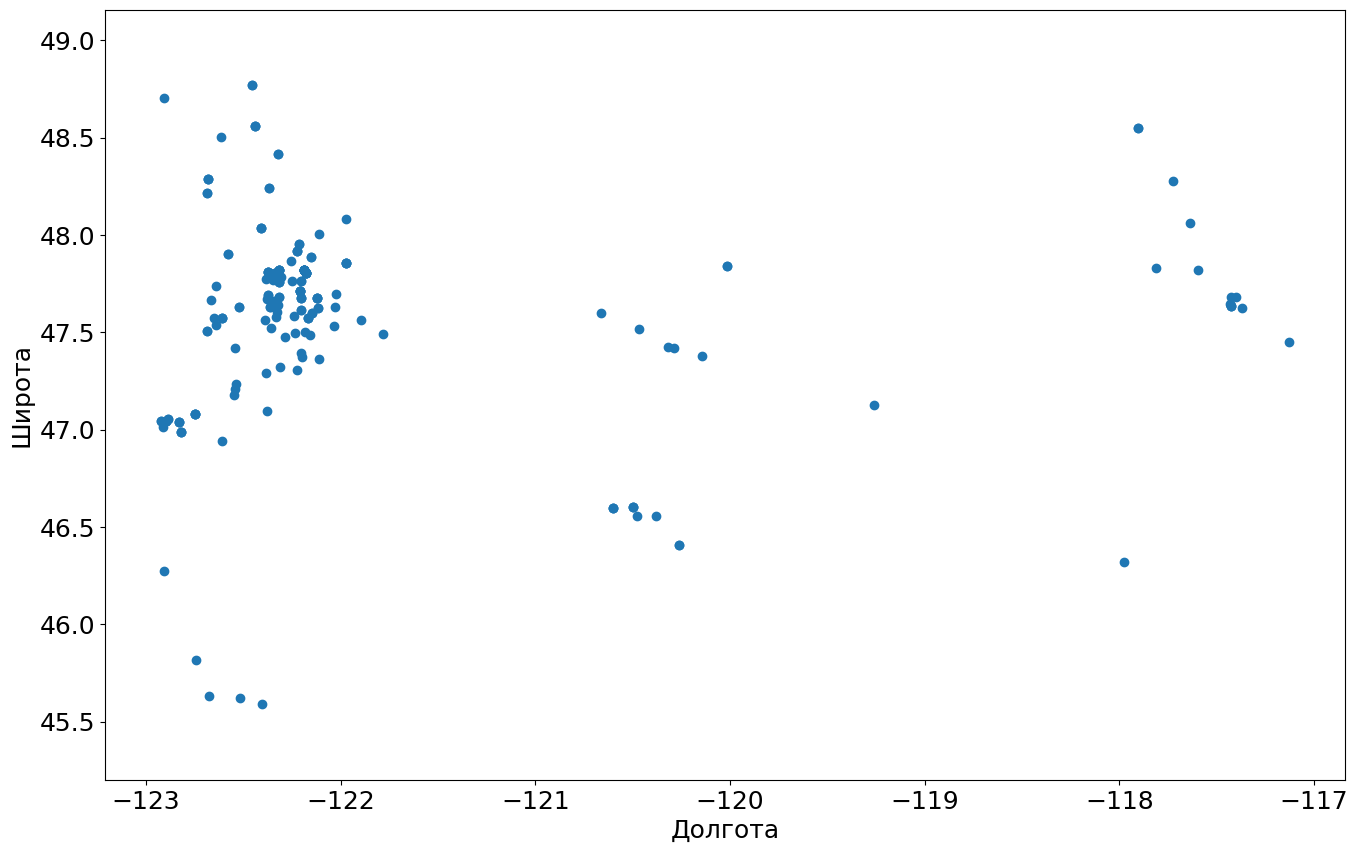

In [175]:
plt.figure(figsize=(16,10))

Lon = electric_vehicles['Vehicle Location Lon']
Lat = electric_vehicles['Vehicle Location Lat']

plt.scatter(Lon, Lat)
plt.axis('equal')
plt.ylabel('Широта', fontsize=18)     
plt.xlabel('Долгота',fontsize=18)
plt.gca().tick_params(labelsize=18)

Если мы передадим аргумент `c=`, то можем строить третью переменную в качестве цвета:

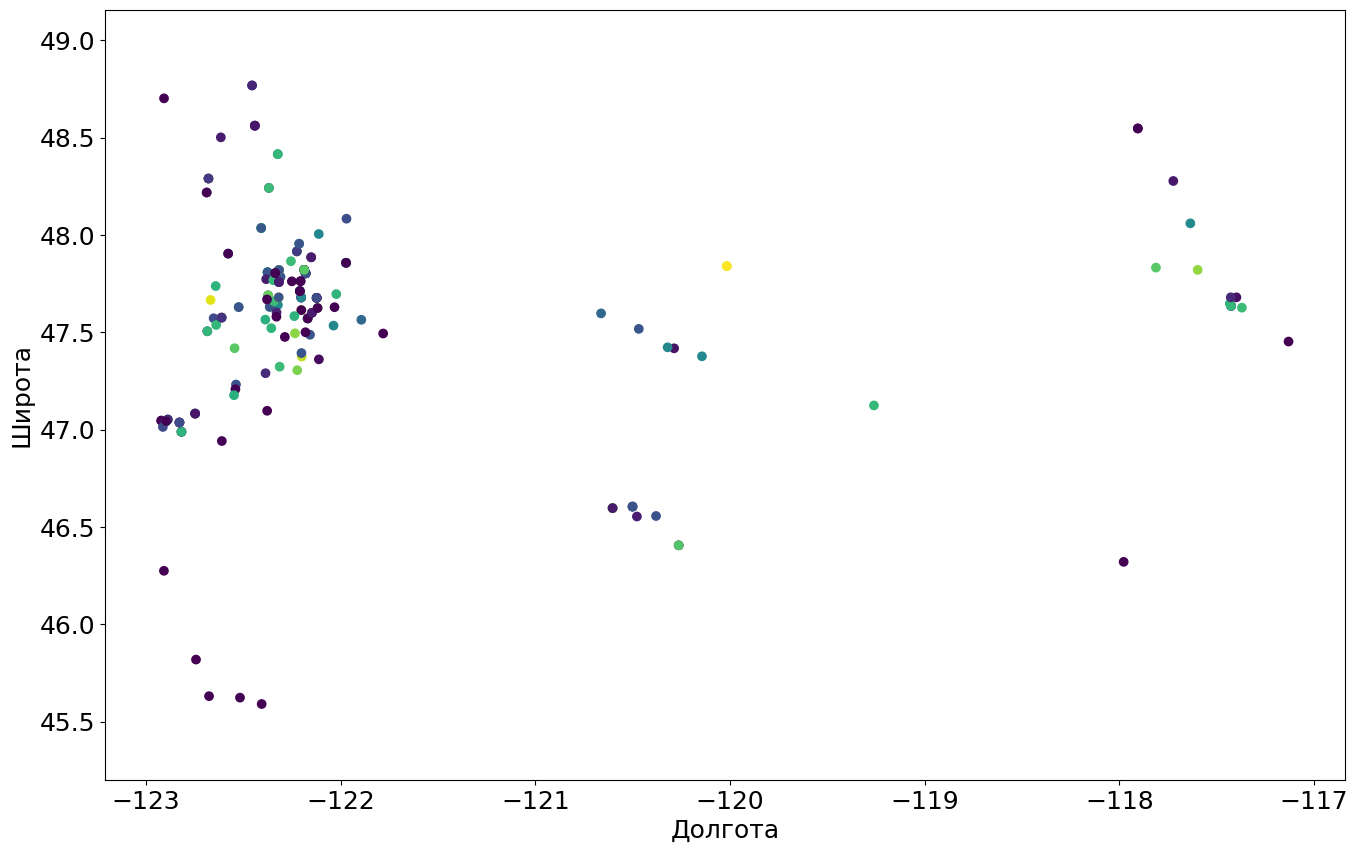

In [174]:
plt.figure(figsize=(16,10))

Lon = electric_vehicles['Vehicle Location Lon']
Lat = electric_vehicles['Vehicle Location Lat']
electric_range = electric_vehicles['Electric Range']

plt.scatter(Lon, Lat, c=electric_range)
plt.axis('equal')
plt.ylabel('Широта', fontsize=18)     
plt.xlabel('Долгота',fontsize=18)
plt.gca().tick_params(labelsize=18)

Впрочем, иногда бывает полезно визуализировать данные с помощью размера маркера. Это можно сделать так:

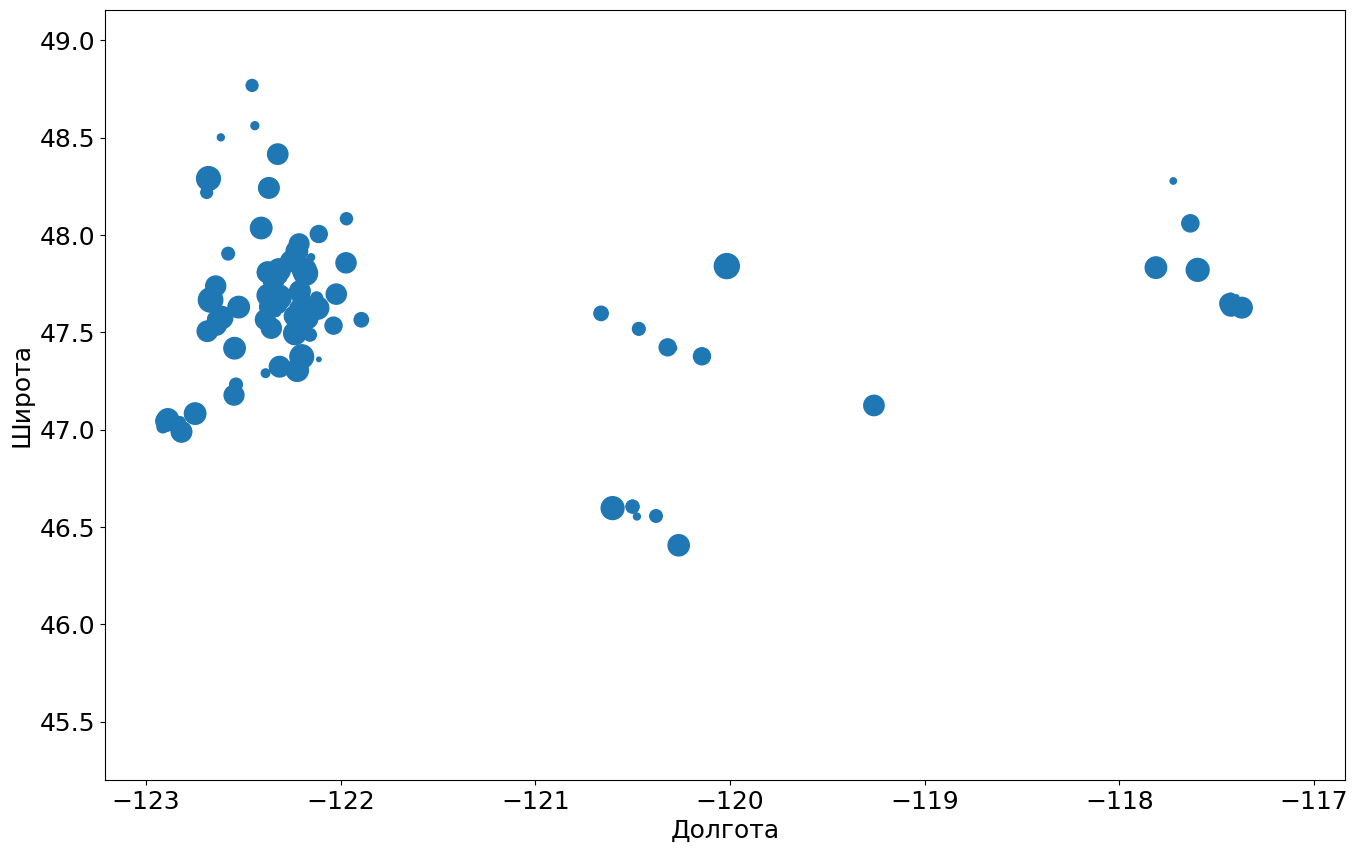

In [173]:
plt.figure(figsize=(16,10))

Lon = electric_vehicles['Vehicle Location Lon']
Lat = electric_vehicles['Vehicle Location Lat']
electric_range = electric_vehicles['Electric Range']

plt.scatter(Lon, Lat, s=electric_range)
plt.axis('equal')
plt.ylabel('Широта', fontsize=18)     
plt.xlabel('Долгота',fontsize=18)
plt.gca().tick_params(labelsize=18)

Впрочем, в большинстве случаев мы пользуемся цветом! В таком случае, надо всегда указывать шкалу цвета (`colorbar` или  просто *колорбар*):

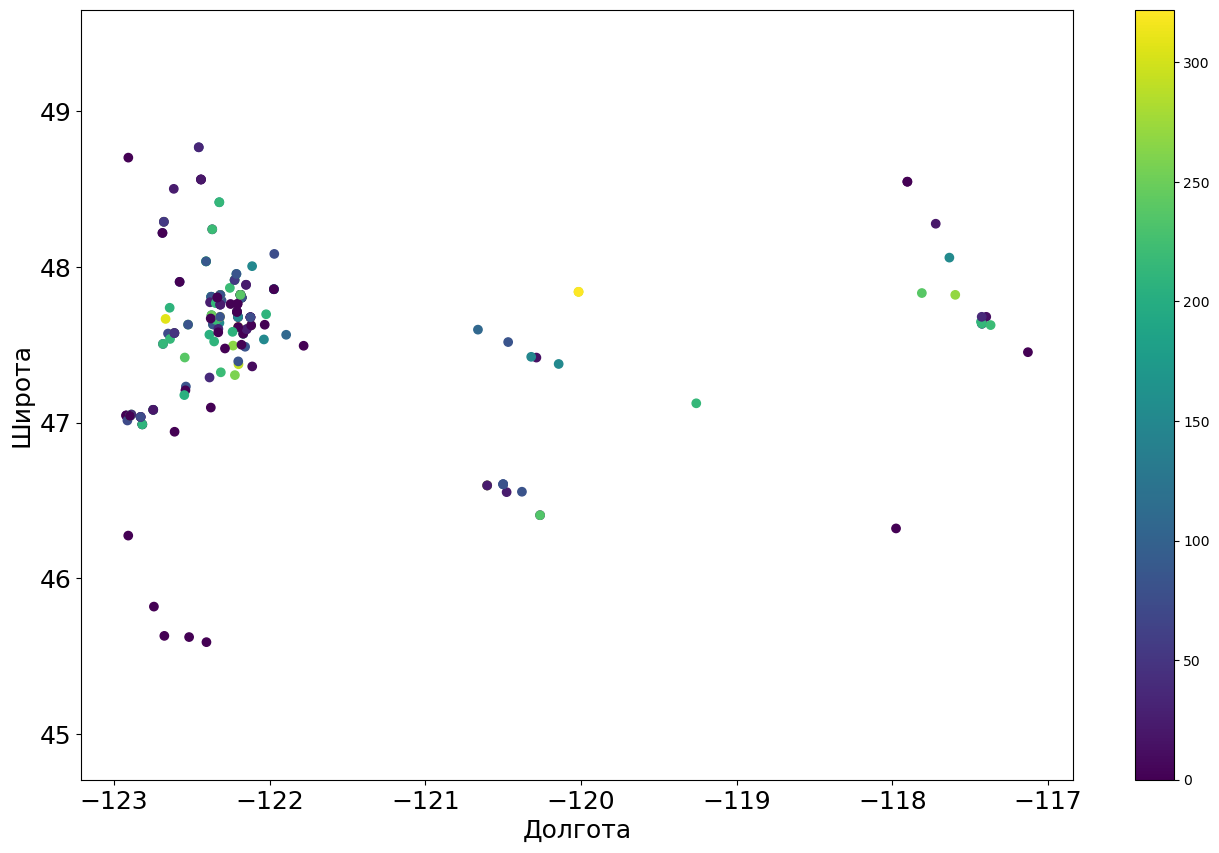

In [180]:
plt.figure(figsize=(16,10))

Lon = electric_vehicles['Vehicle Location Lon']
Lat = electric_vehicles['Vehicle Location Lat']
electric_range = electric_vehicles['Electric Range']

plt.scatter(Lon, Lat, c=electric_range)
plt.axis('equal')
plt.ylabel('Широта', fontsize=18)     
plt.xlabel('Долгота',fontsize=18)

plt.colorbar()

plt.gca().tick_params(labelsize=18)

К сожалению подписать `colorbar` чуть сложнее:

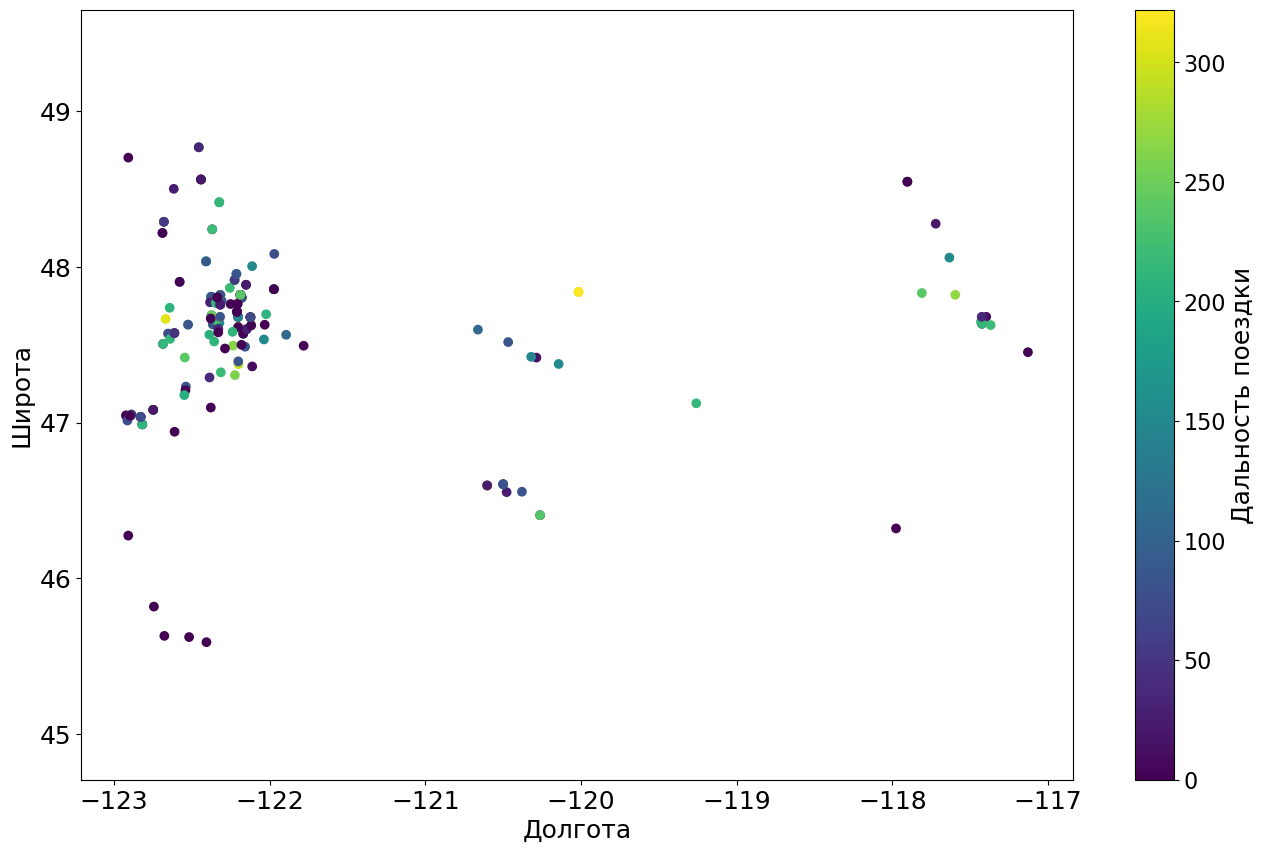

In [186]:
plt.figure(figsize=(16,10))

Lon = electric_vehicles['Vehicle Location Lon']
Lat = electric_vehicles['Vehicle Location Lat']
electric_range = electric_vehicles['Electric Range']

plt.scatter(Lon, Lat, c=electric_range)
plt.axis('equal')
plt.ylabel('Широта', fontsize=18)     
plt.xlabel('Долгота',fontsize=18)

cbar = plt.colorbar()
cbar.set_label('Дальность поездки', fontsize=18)
cbar.ax.tick_params(labelsize=16) # размер цифирок

plt.gca().tick_params(labelsize=18)

## `vmin=` и `vmax=`

Иногда бывает очень полезно ограничить максимальную и максимальную отображаемую величину (почти как `xlim` и `ylim`). Посмотрим на пример:

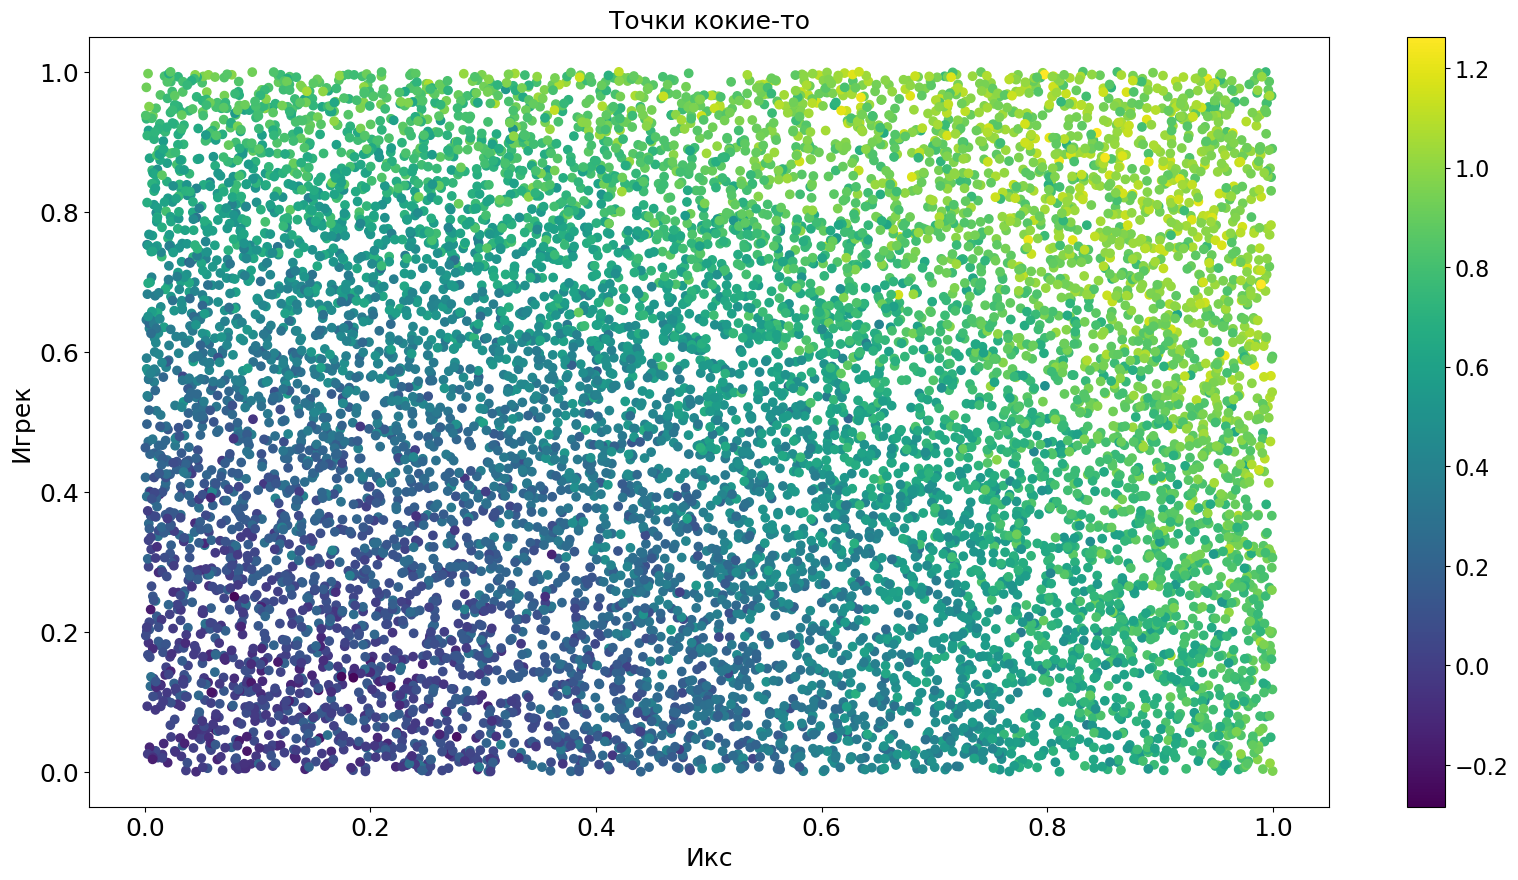

In [187]:
x = np.random.rand(10000,1)
y = np.random.rand(10000,1)

z = np.sin(x**2 + y**2) + 0.1*np.random.randn(len(x), 1) 

plt.figure(figsize=(20,10))
plt.title('Точки кокие-то', fontsize=18)
plt.xlabel('Икс', fontsize=18)
plt.ylabel('Игрек', fontsize=18)
plt.scatter(x, y, c=z) 

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16) 

plt.gca().tick_params(labelsize=18)
plt.show()

Сделаем магию:

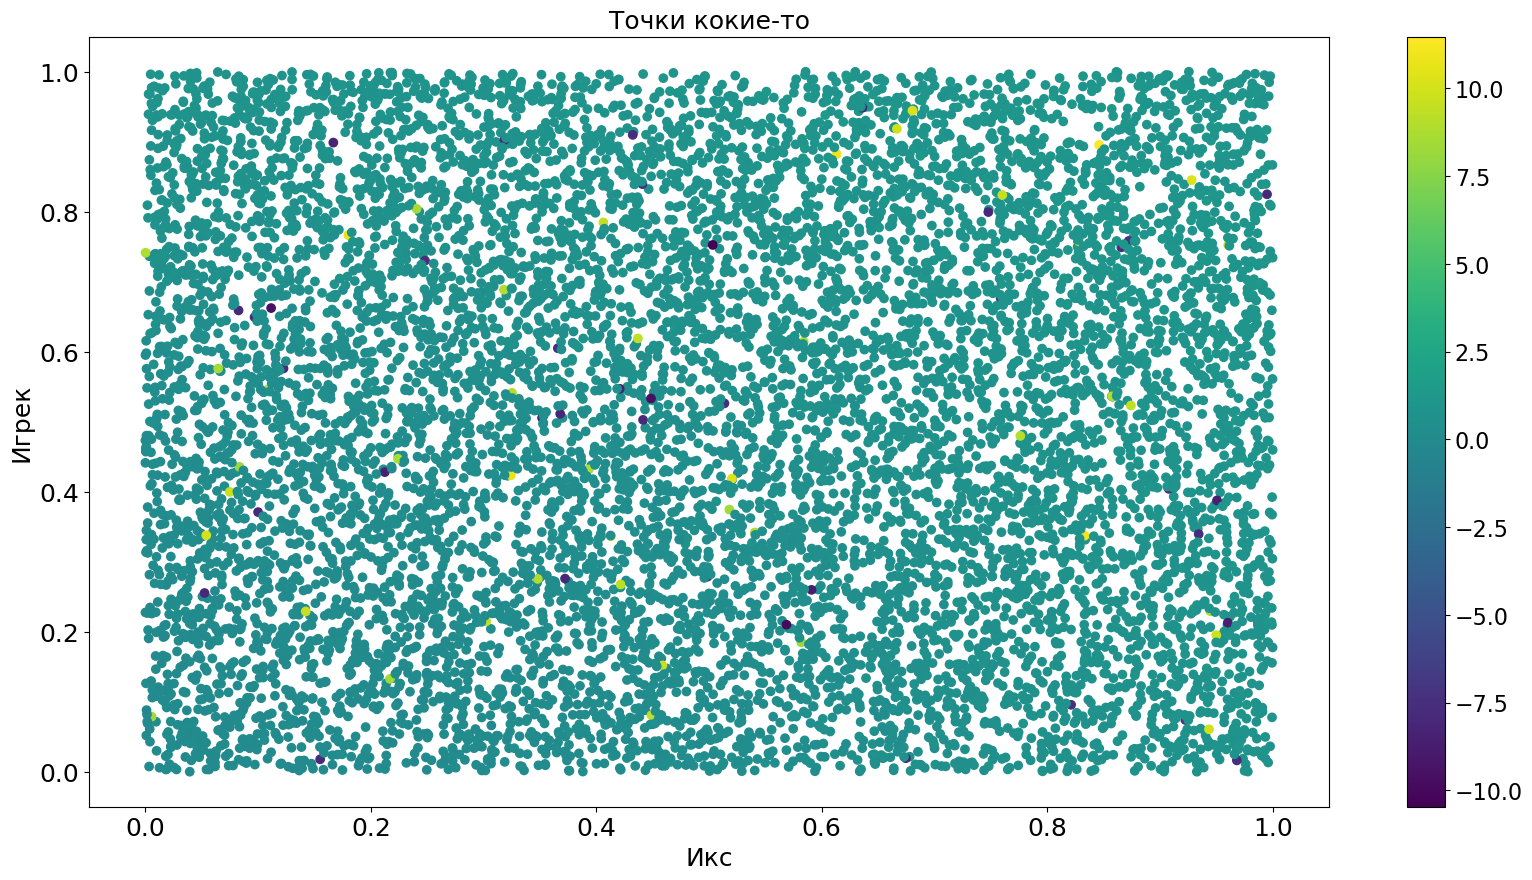

In [188]:
x = np.random.rand(10000,1)
y = np.random.rand(10000,1)

noise = 3*np.random.randn(len(x), 1)
noise[np.abs(noise) < 8] = 0

z = np.sin(x**2 + y**2) + 0.1*np.random.randn(len(x), 1) + noise

plt.figure(figsize=(20,10))
plt.title('Точки кокие-то', fontsize = 18)
plt.xlabel('Икс', fontsize=18)
plt.ylabel('Игрек', fontsize=18)
plt.scatter(x, y, c=z) 

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16) 

plt.gca().tick_params(labelsize=18)
plt.show()

Как это исправить? Ограничим отображаемые величины:

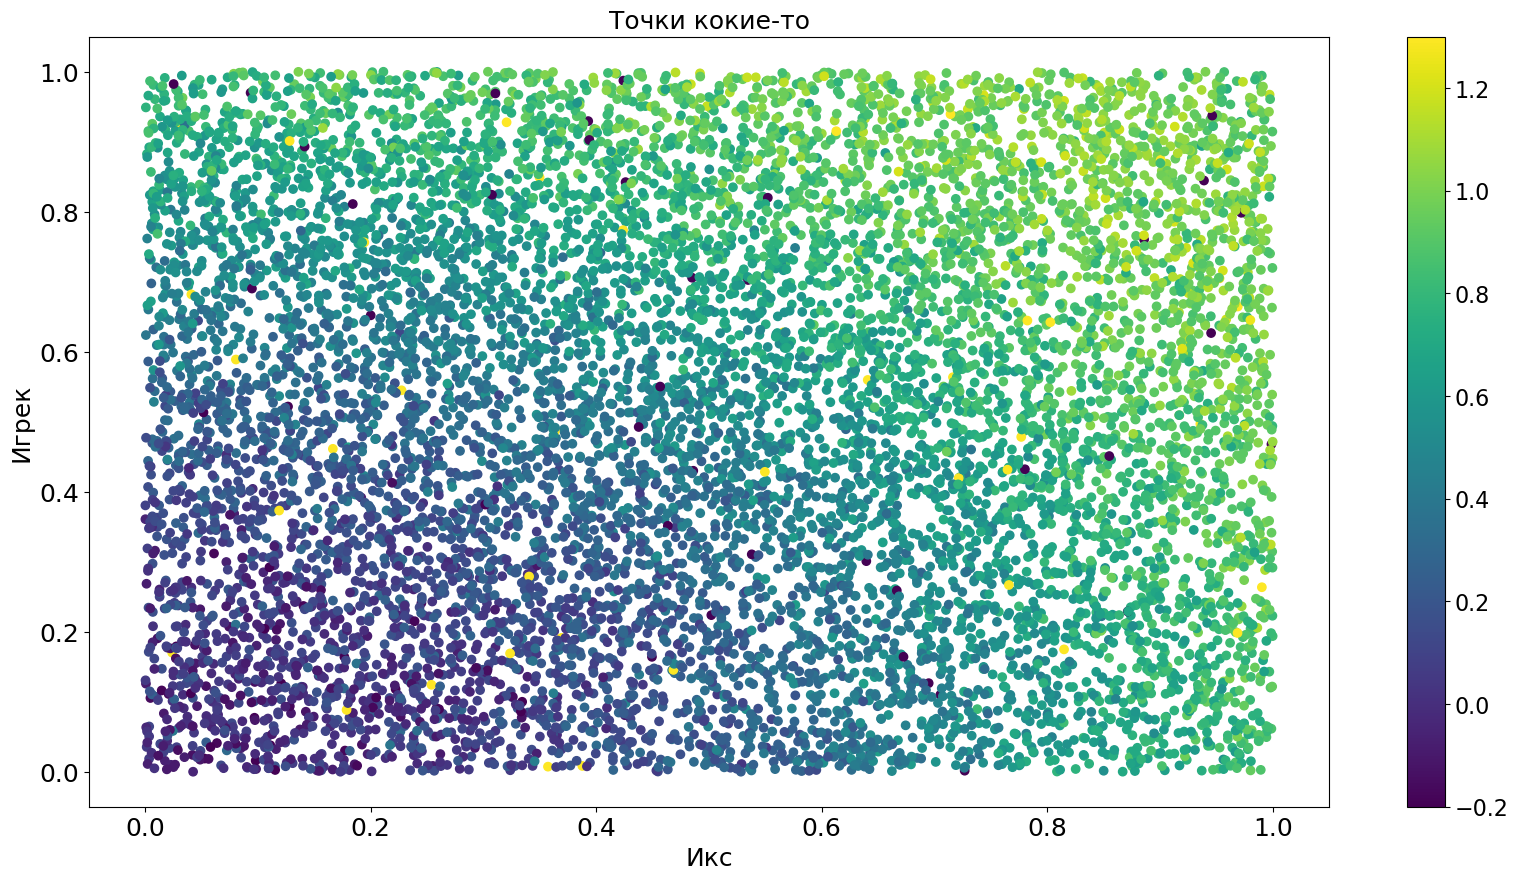

In [190]:
x = np.random.rand(10000,1)
y = np.random.rand(10000,1)

noise = 3*np.random.randn(len(x), 1)
noise[np.abs(noise) < 8] = 0

z = np.sin(x**2 + y**2) + 0.1*np.random.randn(len(x), 1) + noise

plt.figure(figsize=(20,10))
plt.title('Точки кокие-то', fontsize = 18)
plt.xlabel('Икс', fontsize=18)
plt.ylabel('Игрек', fontsize=18)
plt.scatter(x, y, c=z, vmin=-0.2, vmax=1.3) 

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16) 

plt.gca().tick_params(labelsize=18)
plt.show()


<p>
<details>
<summary> ⬇️ <u> Можем их даже обвести! </u> </summary>

```python
x = np.random.rand(10000,1)
y = np.random.rand(10000,1)

noise = 3*np.random.randn(len(x), 1)
noise[np.abs(noise) < 8] = 0

z = np.sin(x**2 + y**2) + 0.1*np.random.randn(len(x), 1) + noise

plt.figure(figsize=(20,10))
plt.title('Точки кокие-то', fontsize = 18)
plt.xlabel('Икс', fontsize = 18)
plt.ylabel('Игрек', fontsize = 18)
plt.scatter(x, y, c=z, vmin=-0.2, vmax=1.3) 

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16) 

plt.gca().tick_params(labelsize=18)
plt.show()
```
![](figures/borders_example.png)
                        
</details>
</p>

## Цветовые схемы

Для отображения цвета можно использовать разные цветовые схемы. Весь список можно посмотреть [здесь](https://matplotlib.org/stable/users/explain/colors/colormaps.html). Стандартная цветовая схема называется `viridis` и все, что мы строили до этого было именно в этой цветовой шкале.

Вот самые популярные:

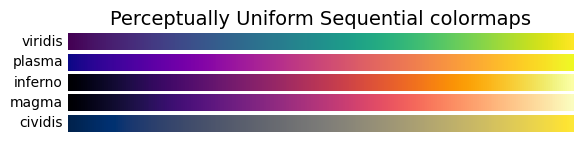

In [3]:
from supplementary import plot_color_gradients

plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

Есть еще одна популярная цветовая шкала (`jet`), которую много не любят и [за дело](https://gorelik.net/2020/08/17/what-is-the-biggest-problem-of-the-jet-and-rainbow-color-maps-and-why-is-it-not-as-evil-as-i-thought/). Однако, у нее есть ее более стильный брат `turbo`, и его применять более чем приемлимо (а иногда даже лучше):

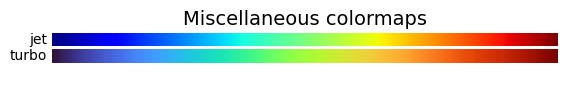

In [4]:
plot_color_gradients('Miscellaneous',
                     ['jet','turbo'])

plt.show()

## `plt.pcolormesh`

Очень часто мы встречаемся с данными вида матрицы `n x m`, которые нужно как-то визуализровать. Возьмем, например, изображение галактики:

In [15]:
from astropy.io import fits
m87 = fits.open('data/M87.fits')
galaxy = m87[0].data
galaxy, galaxy.max(), galaxy.min()

(array([[712, 702, 702, ..., 700, 722, 735],
        [705, 687, 697, ..., 709, 715, 719],
        [680, 681, 710, ..., 712, 717, 715],
        ...,
        [672, 694, 693, ..., 710, 739, 698],
        [700, 673, 679, ..., 731, 719, 716],
        [687, 704, 674, ..., 680, 712, 734]], dtype=int16),
 10355,
 644)

Его можно построить с помощью `plt.pcolormesh`:

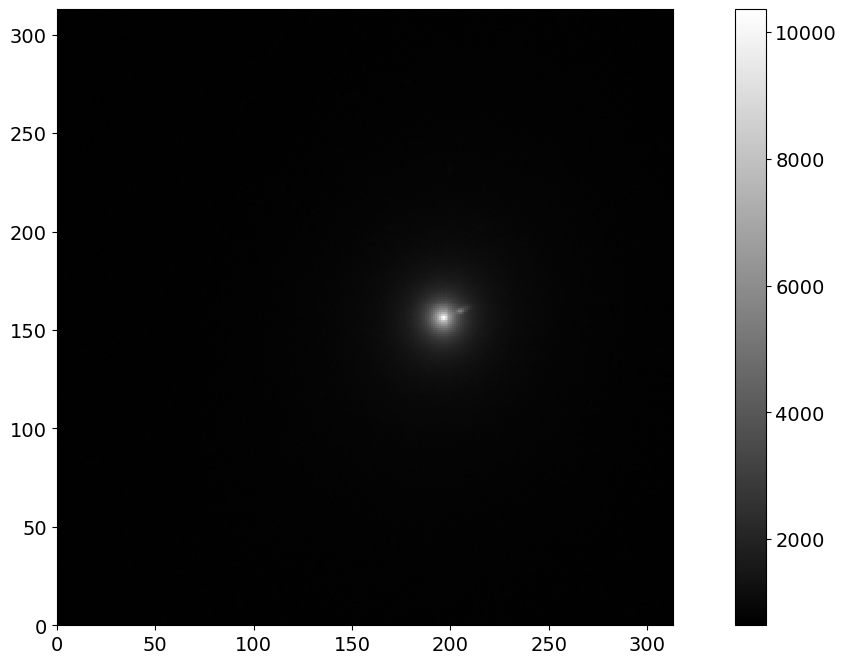

In [27]:
plt.figure(figsize=(16,8))
plt.pcolormesh(galaxy, cmap='gray') 

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14) 

plt.gca().tick_params(labelsize=14)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Посмотрим другой колормап:

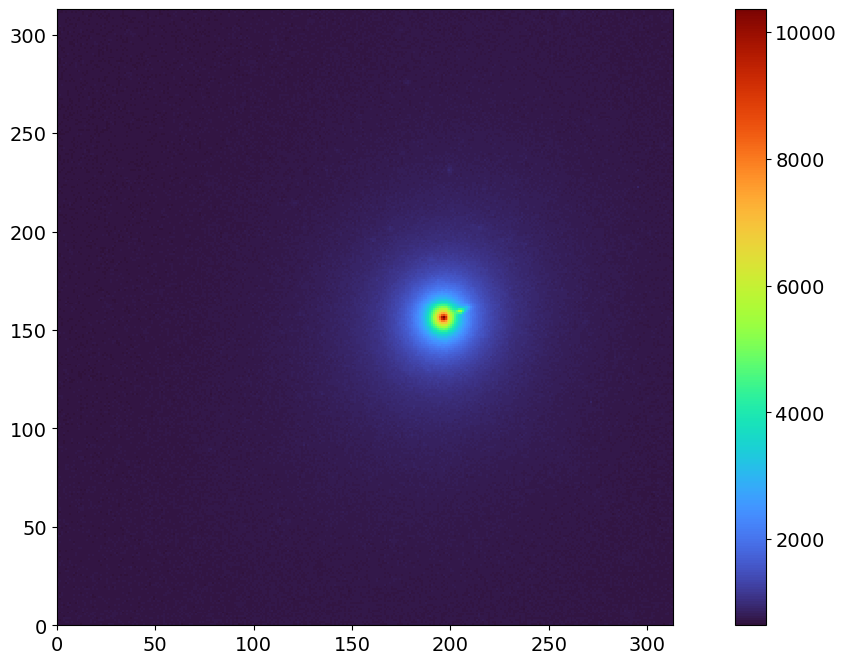

In [28]:
plt.figure(figsize=(16,8))
plt.pcolormesh(galaxy, cmap='turbo') 

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14) 

plt.gca().tick_params(labelsize=14)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

<p>
<details>
<summary> ⬇️ <u> Как сделать логарифмический колормап? </u> </summary>

```python
import matplotlib

plt.figure(figsize=(16,8))
plt.pcolormesh(galaxy, cmap='turbo', norm=matplotlib.colors.LogNorm()) 

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14) 

plt.gca().tick_params(labelsize=14)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()


```
![](figures/galaxy_log_scale.png)
                        
</details>
</p>

## `np.meshgrid`

Что если мы хотим посчитать какую-то формулу на двумерной сетке? Нам может это понадобиться для того чтобы умножить наши двумерные данные на какую-то формулу или просто ее посчитать и нарисовать.

Посчитаем какую-нибудь дурацкую формулу между на `x` и `x` от -5 до +5, например:

$$
R = \sqrt{X^2 + Y^2}
$$

Попробуем посчитать так, как нам говорит интуиция:

In [30]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

r = np.sqrt(x**2 + y**2)
r.shape

(100,)

Че-то это не то что нужно, да? 

А потому что для посчета в двумерной системе, нам нужно сделать хитрую сетку. Мы хотим считать нашу формулу в каждой точки пространства `x` - `y`, а значит нам нужно сделать такую массив, который будет равен значению `x` в точке `i, j`. 

Грубо говоря, просто много раз повторить массив `x` вдоль оси `y`. Это делает фунция `np.meshgrid`, более того, она просто делает правильную магию, если мы дадим ей `x` и `y`:

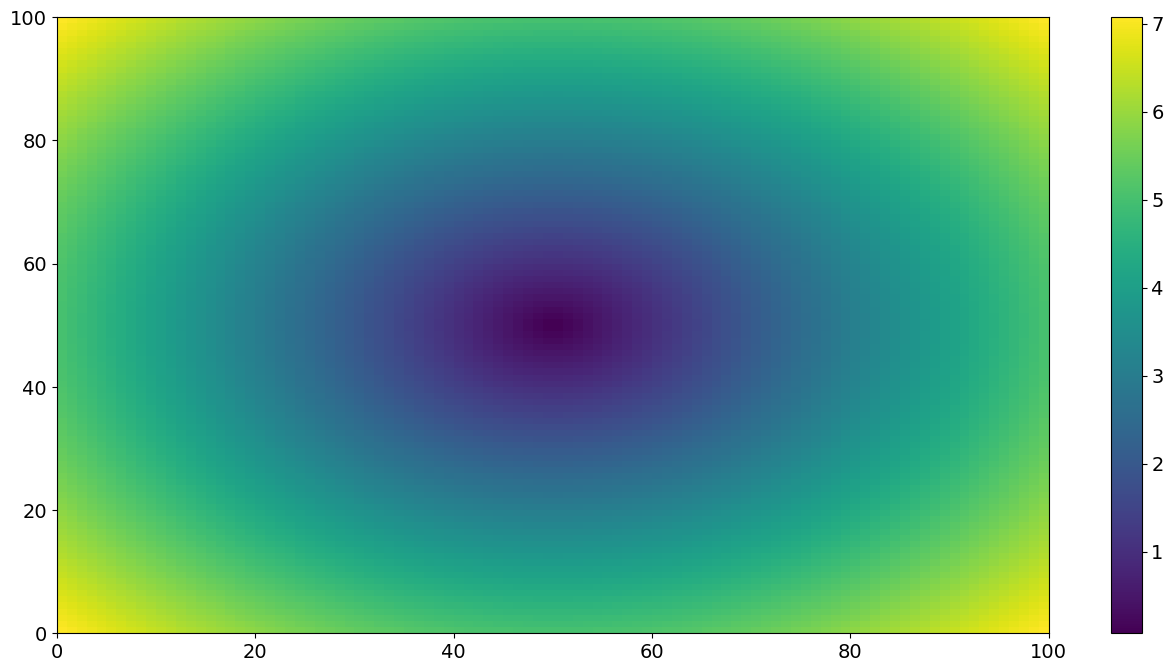

In [31]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y) 
R = np.sqrt(X**2 + Y**2)

plt.figure(figsize=(16,8))
plt.pcolormesh(R) 

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14) 

plt.gca().tick_params(labelsize=14)
plt.show()

> ☝️ Иногда может понадобится поставить параметр `indexing='ij'`

<p>
<details>
<summary> ⬇️ <u> Еще пример (Марсианский) </u> </summary>

Есть специальная функция, которая называется уравнением восхода (заката). Она показывает время (в нашем случае) заката Солнца на планете. Можно построить ее для Марса в зависимости от сезона, и увидеть когда на Марсе полярная ночь/день! 12 - 
    
Ls - это сезон на Марсе, измеряется от 0 до 360, в самом начале года равен 0, в конце равен 360. Физически это положение Марса на орбите в градусах.
    
```python
def sunset_time(Ls, Lat):
    # 25.19 - наклон оси Марса
    delta = np.arcsin(np.sin(25.19*np.pi/180)*np.sin(Ls*np.pi/180))
    omega = np.arccos(max(min(-np.tan(Lat*np.pi/180)*np.tan(delta), 1.0), -1.0))
    time = 12 + (omega*24)/(2*np.pi)
    return time

ls_test = np.arange(0, 360, 0.1)
lat_test = np.arange(-90, 90, 0.1)

LS_TEST, LAT_TEST = np.meshgrid(ls_test, lat_test, indexing='ij')

suns_time_test = np.zeros_like(LS_TEST)

for i in range(len(ls_test)):
    for j in range(len(lat_test)):
        suns_time_test[i,j] = sunset_time(LS_TEST[i,j], LAT_TEST[i,j])
        

plt.figure(figsize=(16,9))
plt.pcolormesh(LS_TEST, LAT_TEST, suns_time_test)

plt.ylabel('Широта', fontsize=18)     
plt.xlabel('Долгота',fontsize=18)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14) 

plt.gca().tick_params(labelsize=14)

plt.show()

```
![](figures/sunset_mars.png)
                        
</details>
</p>